In [151]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster 
import warnings
warnings.filterwarnings("ignore")

In [153]:
df_0414 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-apr14.csv")
df_0514 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-may14.csv")
df_0614 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jun14.csv")
df_2015 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-janjune-15.csv")

In [154]:
df_0414.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [155]:
df_0514.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [156]:
df_0614.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [157]:
df_2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [158]:
df_2015.shape

(14270479, 4)

In [159]:
# MERGING ALL THE DATFRAMES TOGETHER - USING .CONCAT IN CONJUNCTION WITH .DATAFRAME() 

q1402 = pd.DataFrame()

q1402 = pd.concat([df_0414, df_0514 ,df_0614, q1402])

q1402.shape



(1880795, 4)

In [160]:
# CHECK THE NEW DATAFRAME CREATED USING .CONCAT

q1402.head()
q1402.tail()
q1402.shape


(1880795, 4)

In [161]:
# CHECKING FOR DUPLICATED VALUES: 

q1402.head()
q1402.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
q1402.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
q1402.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME (4534327 TO 4451746) - Removed 82581 duplicates


(1852285, 4)

In [162]:
# CHECKING DATATYPES: 

q1402.dtypes # Date/Time needs to be a date/time datatype (not a string)


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [163]:
# CHECKING DATAFRAME FOR NULL VALUES 
q1402.isnull().sum() # NO NULL CALUES PRESENT IN THE DATAFRAME 

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [164]:
q1402.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [165]:
# CONVERTING THE DATE/TIME COLUMN FROM STRING INTO A DATE/TIME DATA TYPE

q1402['Date/Time'] = pd.to_datetime(q1402['Date/Time']) # Note - Make sure you overwrite the correct column you want to change i.e final[Date/Time]



In [166]:
q1402.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [167]:
# CREATING AN HOUR COLUMN IN DATAFRAME
q1402['hours'] = q1402['Date/Time'].dt.hour

In [168]:
# CONVERTING DATETIME INTO DAY: 
q1402['day_name'] = q1402['Date/Time'].dt.day_name()
q1402.head()

,Date/Time,Lat,Lon,Base,hours,day_name
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday


In [169]:
# CONVERTING DATETIME INTO HOUR: 
q1402['hour'] = q1402['Date/Time'].dt.hour
q1402.head()

,Date/Time,Lat,Lon,Base,hours,day_name,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,0


In [170]:
q1402.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'hours', 'day_name', 'hour'], dtype='object')

In [ ]:
#renaming columns into lowercase and without spaces: 
q1402.rename({'Date/Time': 'date_time', 'Lat':'lat', 'Lon':'lon', 'Base':'base', 'Hours':'hours'}, axis = 1, inplace= True)
q1402.head()

,date_time,lat,lon,base,hours,day_name,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,0


#### DATA ANALYSIS

In [171]:
base_count = q1402.copy()

In [172]:
pivot = q1402.groupby(['hours','day_name']).size().unstack()
pivot_reindex = pivot.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot_chart = pivot_reindex

In [173]:
pivot_chart

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hours,,,,,,,
0,2165,2165,2682,3517,5122,10273,13693
1,1223,1186,1484,2002,2966,6964,8843
2,953,873,1077,1376,1921,4493,5495
3,2212,1532,1769,2132,2644,3453,3868
4,3651,2588,2738,3207,3398,2473,2316
5,5776,4939,5167,5879,5159,2611,2138
6,10166,10529,11516,12419,10471,3139,2370
7,13322,14559,15876,16624,14524,4027,3052
8,11954,12359,13889,15429,13677,5363,4331


In [174]:
# pivot_chart = pivot_chart.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
# pivot_chart.rename({'0':'24'}, axis = 0)

In [175]:
# pivot_chart = pivot_chart.rename({0:24}, axis = 0)

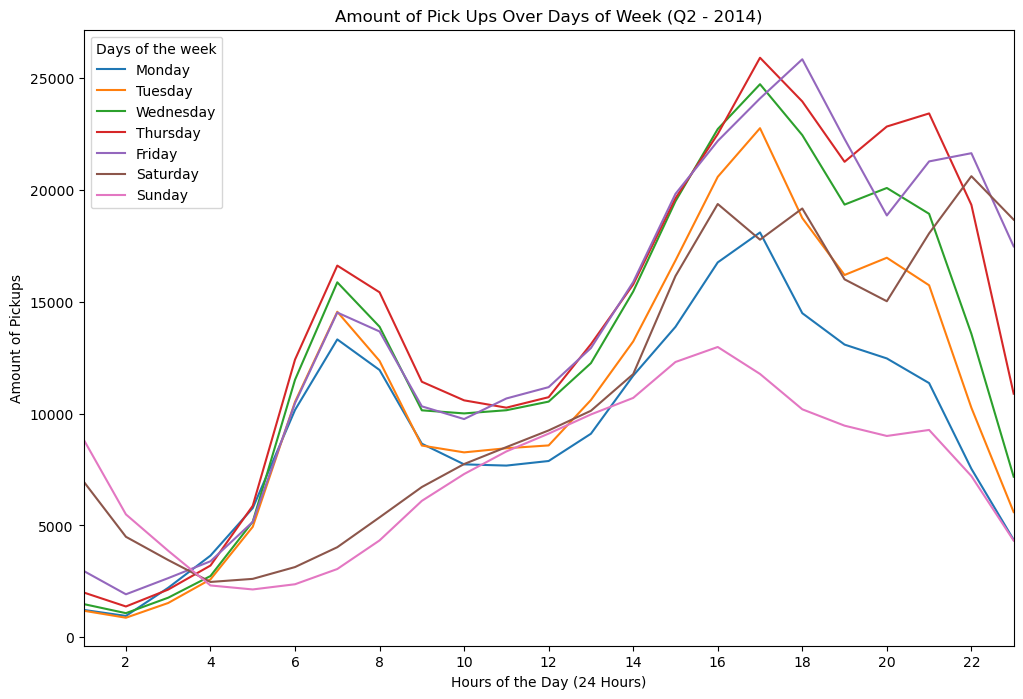

In [176]:

# Uber Blue - #1fbad6
# Uber Grey - #C0C0C8
# Dark Grey - #2D2D2D

#THURSDAY COMPARE TO MONDAY - HIGHLIGHT: 

custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=pivot_chart, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q2 - 2014)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()



## LOCATIONS OF PICK UPS IN NEW YORK CITY

In [177]:
pickups = q1402.copy()

In [178]:
pickups.head()

,Date/Time,Lat,Lon,Base,hours,day_name,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,0


In [ ]:
pickups.dtypes

date_time    datetime64[ns]
lat                 float64
lon                 float64
base                 object
hours                 int32
day_name             object
hour                  int32
dtype: object

In [ ]:
pickups = pickups.drop(['hours', 'day_name', 'base'], axis = 1)

In [ ]:
pickups.shape

(1852285, 4)

In [ ]:
pickups.head(2)

,date_time,lat,lon,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,0
1,2014-04-01 00:17:00,40.7267,-74.0345,0


In [ ]:
pickups['lat']

0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
           ...   
663839    40.7332
663840    40.7905
663841    40.7640
663842    40.7262
663843    40.7404
Name: lat, Length: 1852285, dtype: float64

In [ ]:
pickups['lon']

0        -73.9549
1        -74.0345
2        -73.9873
3        -73.9776
4        -73.9722
           ...   
663839   -73.9872
663840   -73.9796
663841   -73.9887
663842   -73.9944
663843   -73.9848
Name: lon, Length: 1852285, dtype: float64

### CREATING THE HEATMAP: 

In [ ]:
pickups.head(2)

,date_time,lat,lon,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,0
1,2014-04-01 00:17:00,40.7267,-74.0345,0


In [ ]:
pickups = pickups.sample(10000)
print(pickups.shape)

(10000, 4)


In [ ]:
m = folium.Map(location = [40.7, -73.9], zoom_start = 9) # Importing the markers map from Folium
heat_m = folium.Map(location = [40.7, -73.9], zoom_start = 8) # Importing the HeatMap from Folium

In [ ]:
pickups.dtypes # Checking the values of the Lat/Lon columns are Floats

date_time    datetime64[ns]
lat                 float64
lon                 float64
hour                  int32
dtype: object

In [ ]:
pickups.duplicated().sum() # Checking if there are any duplicates.
pickups = pickups.drop_duplicates() # Removing the duplicates for the DataFrame.

In [ ]:
pickups = pickups.dropna(how = 'all') #Dropping any na values from the Dataframe

In [ ]:
pickups.head()

,date_time,lat,lon,hour
329181,2014-04-01 13:18:00,40.6627,-73.9912,13
382714,2014-05-22 22:08:00,40.7404,-73.9946,22
467890,2014-05-07 16:33:00,40.7534,-73.9921,16
134743,2014-05-12 18:37:00,40.7342,-74.0033,18
156358,2014-06-15 13:31:00,40.7537,-73.9716,13


In [ ]:
pickups.shape

(10000, 4)

In [ ]:
# for index, row in pickups.iterrows(): 
#     folium.CircleMarker([row['Lat'], row['Lon']], 
#                     radius = 2,    
#                     popup= row['Date/Time'], # You can add the Base Column too! 
#                     fill_color = "red").add_to(m)

- Reduced sample size 

- Bucket them

- Map box API - Bubble map - Map whole dataset - plotly.express as px (Lon = Lon, lat = df, size = )

- Folium - Cluster Markers - https://deparkes.co.uk/2016/06/24/folium-marker-clusters/

- Simplify 'Lon' and 'Lat' to round to 4 places. 

pickups['Lat (Simplified)'] = round(pickups['Lat'])

pickups['Lon (Simplified)'] = round(pickups['Lon'])

You could try rounding - ROUND([lat],4) ROUND([lon],4)

In [ ]:
# ROUNDING THE LAT AND LON VALUES TO ROUND POINTS: 

lat = 40.75258189875482
lon = -74.0065557551885

simple_lat = round(lat,4)
simple_lon = round(lon,4)


print(simple_lat)
print(simple_lon)

40.7526
-74.0066


In [ ]:
pickups.shape

(10000, 4)

In [ ]:
# SIMPLIFYING THE LON AND LAT VALUES TO 2 DECIMAL POINTS FOR BUCKETING ON CLUSTER MAPS: 

pickups['simple_lat'] = round(pickups['lat'],2)
pickups['simple_lon'] = round(pickups['lon'],2)

In [ ]:
locations = list(zip(pickups['lat'], pickups['lon']))
#popups = ["lon:{}<br>lat:{}".format(pickups['simple_lon'], pickups['simple_lat']) for (pickups['simple_lat'], pickups['simple_lon']) in locations]



marker_cluster = MarkerCluster(
    locations = locations,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);


In [ ]:
m

In [ ]:
pickups_mat = pickups[['lat', 'lon']].to_numpy()
HeatMap(pickups_mat).add_to(heat_m);

In [ ]:
heat_m

### AMOUNT OF PICKUPS PER MONTH: 

In [179]:
q1402.drop_duplicates(inplace = True)

In [180]:
q1402.tail()

,Date/Time,Lat,Lon,Base,hours,day_name,hour
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,22,Monday,22
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,23,Monday,23
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,23,Monday,23
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,23,Monday,23
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,23,Monday,23


In [181]:
q1402.shape

(1852285, 7)

In [182]:
q1402.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
hours                 int32
day_name             object
hour                  int32
dtype: object

In [184]:
q1402['month'] = q1402['Date/Time'].dt.month

In [185]:
total = q1402['hours'].value_counts()


In [186]:
april = q1402.query('`month`== 4')
may = q1402.query('`month`== 5')
june = q1402.query('`month`== 6')

In [187]:
april_total = len(april)
may_total = len(may)
june_total = len(june)


In [188]:
print(april_total)
print(may_total)
print(june_total)

556767
642360
653158


In [189]:
data = {'Months' : ['April', 'May', 'June'],
        'Totals' : [april_total,  may_total,  june_total]}

months = pd.DataFrame(data)

print(months)

  Months  Totals
0  April  556767
1    May  642360
2   June  653158


In [190]:
months

,Months,Totals
0,April,556767
1,May,642360
2,June,653158


In [191]:
print(len(df_0414))
print(len(df_0514))
print(len(df_0614))


564516
652435
663844


In [192]:
print(df_0414.value_counts().sum())
print(df_0514.value_counts().sum())
print(df_0614.value_counts().sum())

564516
652435
663844


In [193]:
df_0414.drop_duplicates(inplace=True)

In [194]:
df_0514.drop_duplicates(inplace=True)

In [195]:
df_0614.drop_duplicates(inplace=True)

In [198]:
months

,Months,Totals
0,April,556767
1,May,642360
2,June,653158


In [199]:
x = months['Months']
y = months['Totals']



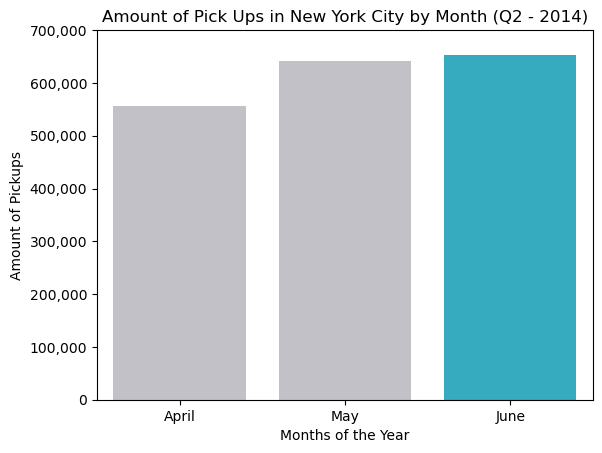

In [200]:
custom_colours1 = ['#C0C0C8', '#C0C0C8', '#1fbad6']

sns.barplot(x = x, y = y, palette = custom_colours1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2014)", yticklabels = ['0', '100,000', '200,000', '300,000',  '400,000',  '500,000', '600,000', '700,000'], ylim = (0,700000));
plt.show()



### PICKUPS BY DAY

In [201]:
days = q1402.copy()


monday = days.query('`day_name` == "Monday"')
tuesday = days.query('`day_name` == "Tuesday"')
wednesday = days.query('`day_name` == "Wednesday"')
thursday = days.query('`day_name` == "Thursday"')
friday = days.query('`day_name` == "Friday"')
saturday = days.query('`day_name` == "Saturday"')
sunday = days.query('`day_name` == "Sunday"')

In [202]:
monday_total = monday.query('`day_name` == "Monday"').value_counts().sum()
tuesday_total = tuesday.query('`day_name` == "Tuesday"').value_counts().sum()
wednesday_total = wednesday.query('`day_name` == "Wednesday"').value_counts().sum()
thursday_total = thursday.query('`day_name` == "Thursday"').value_counts().sum()
friday_total = friday.query('`day_name` == "Friday"').value_counts().sum()
saturday_total = saturday.query('`day_name` == "Saturday"').value_counts().sum()
sunday_total = sunday.query('`day_name` == "Sunday"').value_counts().sum()

print(monday_total, tuesday_total, wednesday_total, thursday_total, friday_total, saturday_total, sunday_total)

216251 252200 293349 324312 324217 257819 184137


In [203]:
day = {'Day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [monday_total, tuesday_total, wednesday_total,  thursday_total,  friday_total, saturday_total, sunday_total]}

daytotal = pd.DataFrame(day)

print(daytotal)

         Day  Totals
0     Monday  216251
1    Tuesday  252200
2  Wednesday  293349
3   Thursday  324312
4     Friday  324217
5   Saturday  257819
6     Sunday  184137


In [204]:
daytotal.head()

,Day,Totals
0,Monday,216251
1,Tuesday,252200
2,Wednesday,293349
3,Thursday,324312
4,Friday,324217


In [205]:
x2 = daytotal['Day']
y2 = daytotal['Totals']

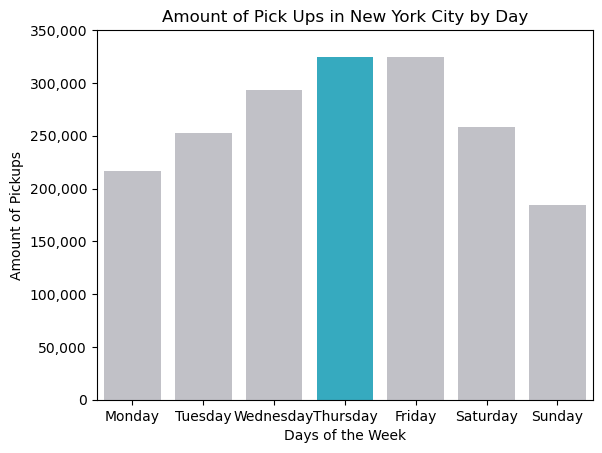

In [206]:
custom_colours2 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8', '#c0c0c8', '#c0c0c8']

sns.barplot(x = x2, y = y2, palette = custom_colours2).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day", yticklabels = ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000', '350,000',], ylim = (0,350000));
plt.show()

In [210]:
days.groupby(['Date/Time','day_name']).size().unstack()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date/Time,,,,,,,
2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2014-04-01 00:01:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2014-04-01 00:02:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2014-04-01 00:03:00,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2014-04-01 00:04:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...
2014-06-30 23:55:00,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2014-06-30 23:56:00,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2014-06-30 23:57:00,NaN,3.0,NaN,NaN,NaN,NaN,NaN


### MOST POPULAR BASE:

In [211]:
q1402.head(2)

,Date/Time,Lat,Lon,Base,hours,day_name,hour,month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,0,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,0,4


In [212]:
q1402['base'].unique()

KeyError: 'base'

In [213]:
base_1 = q1402.query('`base` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_2 = q1402.query('`base` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_3 = q1402.query('`base` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_4 = q1402.query('`base` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_5 = q1402.query('`base` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885


UndefinedVariableError: name 'base' is not defined

In [ ]:
base1total = base_1.value_counts().sum()
base2total = base_2.value_counts().sum()
base3total = base_3.value_counts().sum()
base4total = base_4.value_counts().sum()
base5total = base_5.value_counts().sum()

In [ ]:
base = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH'],
        'Totals' : [base1total, base2total, base3total,  base4total,  base5total]}

basetotal = pd.DataFrame(base)

print(basetotal)

       Base  Totals
0     UNTER  101373
1    HINTER  680282
2    WEITER  404007
3  CHMECKEN  638502
4    DANACH   28121


In [ ]:
x1 = basetotal['Base']
y1 = basetotal['Totals']

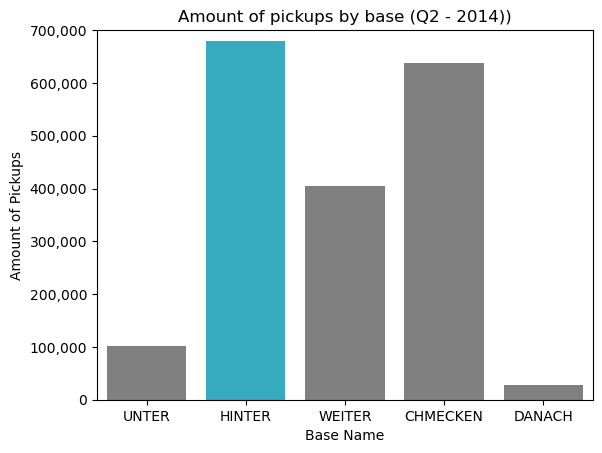

In [ ]:
custom_colour3 = ['grey' , '#1fbad6', 'grey', 'grey', 'grey']

sns.barplot(x = x1, y = y1, palette= custom_colour3).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2014))", yticklabels = ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'], ylim = (0,700000));
plt.show()

### NYC WEATHER

In [ ]:
nyc_weather = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\New York Weather (Yearly - 2016)\weather_data_nyc.csv")

In [ ]:
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [ ]:
# CLEANING THE DATASET 

nyc_weather.duplicated().sum() # CHECK FOR DUPLICATES

nyc_weather['date'] = pd.to_datetime(nyc_weather['date'], format='mixed', dayfirst=1-1-2016) # Converting the Date column into a datatime data type

nyc_weather = nyc_weather.drop(['snow fall', 'snow depth'], axis = 1) #Removing unwanted columns from DataFrame

nyc_weather.replace('T', 0.0, inplace=True) # Replacing all 'T' values in DataFrame to '0.0' to convert to float value.

nyc_weather['precipitation'] = nyc_weather['precipitation'].astype(float) # Converting precipitation column into a float datatype

nyc_weather['month'] = nyc_weather['date'].dt.month #CONVERT THE DATE COLUMN TO MONTHS


In [ ]:
nyc_weather.describe()
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
0,2016-01-01,42,34,38.0,0.0,1
1,2016-01-02,40,32,36.0,0.0,1
2,2016-01-03,45,35,40.0,0.0,1
3,2016-01-04,36,14,25.0,0.0,1
4,2016-01-05,29,11,20.0,0.0,1


### NYC WEATHER - MONTHLY RAINFALL

In [ ]:
nyc_rain = nyc_weather.copy()

In [ ]:
nyc_weather.dtypes

date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                 float64
month                           int32
dtype: object

In [ ]:
apr = nyc_weather.query('`month` == 4')
may = nyc_weather.query('`month` == 5')
jun = nyc_weather.query('`month` == 6')
jul = nyc_weather.query('`month` == 7')
aug = nyc_weather.query('`month` == 8')
sep = nyc_weather.query('`month` == 9')

In [ ]:
sep.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
244,2016-09-01,79,69,74.0,0.5,9
245,2016-09-02,81,66,73.5,0.0,9
246,2016-09-03,75,66,70.5,0.0,9
247,2016-09-04,80,65,72.5,0.0,9
248,2016-09-05,84,65,74.5,0.0,9


In [ ]:
apr_rain = round(apr['precipitation'].sum(),2)
may_rain = round(may['precipitation'].sum(),2)
jun_rain = round(jun['precipitation'].sum(),2)
jul_rain = round(jul['precipitation'].sum(),2)
aug_rain = round(aug['precipitation'].sum(),2)
sep_rain = round(sep['precipitation'].sum(),2)


In [ ]:
print(apr_rain)
print(may_rain)
print(jun_rain)
print(jul_rain)
print(aug_rain)
print(sep_rain)

1.61
3.75
2.6
7.02
1.97
2.79


In [ ]:
nyc_rain = {'months' : ['April', 'May', 'June', 'July', 'August', 'September'],
        'total_rain' : [apr_rain, may_rain, jun_rain, jul_rain, aug_rain, sep_rain]}

nyc_rain = pd.DataFrame(nyc_rain)

print(nyc_rain)

      months  total_rain
0      April        1.61
1        May        3.75
2       June        2.60
3       July        7.02
4     August        1.97
5  September        2.79


In [ ]:
nyc_rain.head()

,months,total_rain
0,April,1.61
1,May,3.75
2,June,2.60
3,July,7.02
4,August,1.97


In [ ]:
months_x = nyc_rain['months']
rain_y = nyc_rain['total_rain']

- What colours should be used in 

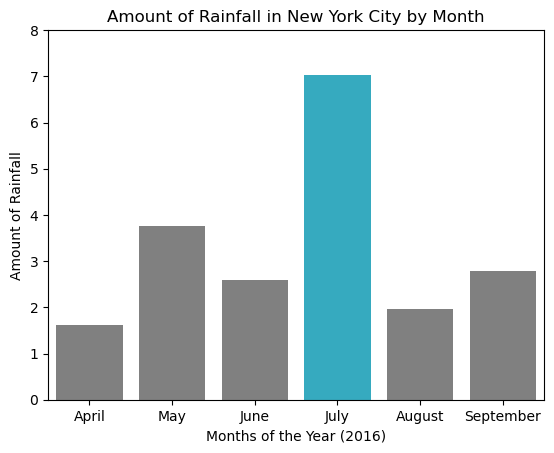

In [ ]:
colours_5 = ['grey', 'grey', 'grey', '#1fbad6', 'grey' , 'grey']

sns.barplot(x = months_x, y = rain_y, palette = colours_5  ).set(xlabel = "Months of the Year (2016)", ylabel = "Amount of Rainfall", title = "Amount of Rainfall in New York City by Month", yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8'], ylim = (0,8));
plt.show()

# LABEL UNITS ON Y AXIS 


NYC WEATHER - TEMP

In [ ]:
apr = apr.drop(['precipitation', 'average temperature'], axis = 1)
may = may.drop(['precipitation', 'average temperature'], axis = 1)
jun = jun.drop(['precipitation', 'average temperature'], axis = 1)
jul = jul.drop(['precipitation', 'average temperature'], axis = 1)
aug = aug.drop(['precipitation', 'average temperature'], axis = 1)
sep = sep.drop(['precipitation', 'average temperature'], axis = 1)

In [ ]:
apr.head()

,date,maximum temperature,minimum temperature,month
91,2016-04-01,79,61,4
92,2016-04-02,61,49,4
93,2016-04-03,50,34,4
94,2016-04-04,45,29,4
95,2016-04-05,43,26,4


In [ ]:
# MAX TEMP 

apr_max = apr['maximum temperature'].max()
may_max = may['maximum temperature'].max()
jun_max = jun['maximum temperature'].max()
jul_max = jul['maximum temperature'].max()
aug_max = aug['maximum temperature'].max()         
sep_max = sep['maximum temperature'].max()

# MIN TEMP

apr_min = apr['minimum temperature'].min()
may_min = may['minimum temperature'].min()
jun_min = jun['minimum temperature'].min()
jul_min = jul['minimum temperature'].min()
aug_min = aug['minimum temperature'].min()
sep_min = sep['minimum temperature'].min()

# AVERAGE TEMP

apr_avg = (apr_max + apr_min) / 2
may_avg = (may_max + may_min) / 2
jun_avg = (jun_max + jun_min) / 2
jul_avg = (jul_max + jul_min) / 2
aug_avg = (aug_max + aug_min) / 2
sep_avg = (sep_max + sep_min) / 2



In [ ]:
print(apr_avg)
print(may_avg)
print(jun_avg)
print(jul_avg)
print(aug_avg)
print(sep_avg)

54.0
67.5
70.0
79.5
78.5
72.5


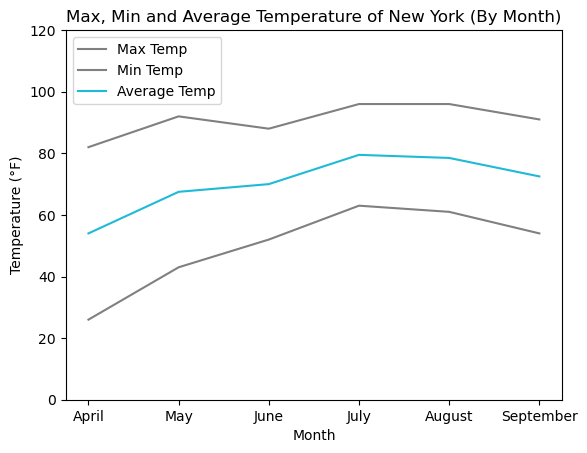

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colour4 = ['grey', '#1fbad6'] #COLOURS TO UBER COLOUR SCHEME

# Sample data
temp = {
    'x': ['April', 'May', 'June', 'July', 'August', 'September'],
    'y1': [apr_max, may_max, jun_max, jul_max, aug_max, sep_max],
    'y2': [apr_min, may_min, jun_min, jul_min, aug_min, sep_min],
    'y3': [apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg],
}

# Convert data to a DataFrame
import pandas as pd
nyc_temp = pd.DataFrame(temp)

# Plot multiple lines
sns.lineplot(data=nyc_temp, x='x', y='y1', label='Max Temp', color = colour4[0]).set(title = 'Max, Min and Average Temperature of New York (By Month)', xlabel = 'Month', ylabel = 'Temperature (°F)', yticklabels = ['0', '20', '40', '60', '80', '100', '120'], ylim = (0,120));
sns.lineplot(data=nyc_temp, x='x', y='y2', label='Min Temp', color = colour4[0])
sns.lineplot(data=nyc_temp, x='x', y='y3', label='Average Temp',color = colour4[1])


# Show the plot
plt.legend()
plt.show()

In [ ]:
print(apr_max)
print(apr_min)
print(apr_avg)

82
26
54.0


#### 2nd Quarter of 2015 data: 

In [214]:
q1502 = df_2015.copy()

In [215]:
q1502.tail()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45
14270478,B02765,2015-05-08 15:44:00,B02682,144


In [216]:
q1502.sample(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
4759997,B02682,2015-05-30 00:54:00,B02682,79
8131179,B02682,2015-05-02 10:32:00,B02682,255
9637762,B02682,2015-05-07 11:57:00,B02682,233
100987,B02764,2015-01-05 15:32:10,B02764,236
5523152,B02682,2015-03-01 20:40:00,B02682,161
1120524,B02682,2015-05-20 07:29:00,B02682,229
11825325,B02764,2015-01-05 14:56:42,NaN,132
8466405,B02764,2015-06-23 20:40:00,B02764,234
12151422,B02764,2015-02-08 00:28:34,B02764,114
8195997,B02682,2015-01-12 14:57:20,B02682,144


In [217]:
q1502.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [218]:
q1502.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


In [219]:
q1502.describe(include = 'object')

,Dispatching_base_num,Pickup_date,Affiliated_base_num
count,14270479,14270479,14108284
unique,8,2744783,284
top,B02764,2015-06-27 22:19:00,B02764
freq,5753653,213,4352321


#### CLEANING DATA: 

In [220]:
q1502.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [221]:
q1502.shape

(14270479, 4)

In [222]:
q1502.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [223]:
# Dropping thr affiliated base number: 
q1502.drop('Affiliated_base_num', axis = 1, inplace = True)

In [224]:
df_2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [225]:
# Rename the columns of the dataframe:

q1502 = q1502.rename({'Dispatching_base_num':'base_number', 'Pickup_date':'date','locationID':'location_id'}, axis = 1)


In [226]:
q1502.head()

,base_number,date,location_id
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90


In [227]:
q1502.columns

Index(['base_number', 'date', 'location_id'], dtype='object')

In [228]:
q1502.head()

,base_number,date,location_id
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90


In [229]:
q1502 = q1502.reindex(['date', 'base_number', 'location_id'], axis = 1)

In [230]:
q1502.head()

,date,base_number,location_id
0,2015-05-17 09:47:00,B02617,141
1,2015-05-17 09:47:00,B02617,65
2,2015-05-17 09:47:00,B02617,100
3,2015-05-17 09:47:00,B02617,80
4,2015-05-17 09:47:00,B02617,90


In [231]:
q1502 = q1502.sort_values(by= 'date', ascending = True)

In [232]:
q1502.head()

,date,base_number,location_id
832778,2015-01-01 00:00:05,B02764,255
90608,2015-01-01 00:00:05,B02598,144
9371715,2015-01-01 00:00:08,B02682,113
9368311,2015-01-01 00:00:11,B02682,234
1084752,2015-01-01 00:00:13,B02764,232


In [233]:
#RESETTING INDEX OF DATAFRAME AFTER ORDER THE DATAFRAME BY DATE: 
q1502.reset_index(0, inplace= True)

In [234]:
# Dropping the index column from the dataframe: 
q1502.drop('index', axis = 1, inplace = True)

In [235]:
q1502.head()

,date,base_number,location_id
0,2015-01-01 00:00:05,B02764,255
1,2015-01-01 00:00:05,B02598,144
2,2015-01-01 00:00:08,B02682,113
3,2015-01-01 00:00:11,B02682,234
4,2015-01-01 00:00:13,B02764,232


In [236]:
q1502.tail()

,date,base_number,location_id
14270474,2015-06-30 23:59:00,B02764,246
14270475,2015-06-30 23:59:00,B02764,90
14270476,2015-06-30 23:59:00,B02764,148
14270477,2015-06-30 23:59:00,B02764,231
14270478,2015-06-30 23:59:00,B02682,88


In [237]:
# Checking the dataframe columns: 

q1502.dtypes

date           object
base_number    object
location_id     int64
dtype: object

In [238]:
# Changing date column to a datetime column: 

q1502['date'] = pd.to_datetime(q1502['date'])

In [239]:
q1502.dtypes

date           datetime64[ns]
base_number            object
location_id             int64
dtype: object

In [240]:
# EXTRACTING MONTH NAME: 

q1502['month'] = q1502['date'].dt.month_name()

In [241]:
# EXTRACTING DAY_NAME: 

q1502['day_name'] = q1502['date'].dt.day_name()



In [242]:
# EXTRACTING HOUR: 

q1502['hour'] = q1502['date'].dt.hour

In [243]:
# EXTRACTING HOUR: 

q1502['day'] = q1502['date'].dt.day

In [244]:
# CHECKING FOR DUPLICIATE VALUES
q1502.duplicated().sum()

1440372

In [245]:
#DROPPING DUPLICATE VALUES: 
q1502.drop_duplicates(inplace = True)

In [246]:
q1502.shape

(12830107, 7)

In [247]:
# CHECKING DATAFRAME FOR NULL VALUES: 
q1502.isnull().sum()

date           0
base_number    0
location_id    0
month          0
day_name       0
hour           0
day            0
dtype: int64

In [248]:
q1502.head()

,date,base_number,location_id,month,day_name,hour,day
0,2015-01-01 00:00:05,B02764,255,January,Thursday,0,1
1,2015-01-01 00:00:05,B02598,144,January,Thursday,0,1
2,2015-01-01 00:00:08,B02682,113,January,Thursday,0,1
3,2015-01-01 00:00:11,B02682,234,January,Thursday,0,1
4,2015-01-01 00:00:13,B02764,232,January,Thursday,0,1


#### SPLITTING UP DATES 

In [249]:
q1502.head()

,date,base_number,location_id,month,day_name,hour,day
0,2015-01-01 00:00:05,B02764,255,January,Thursday,0,1
1,2015-01-01 00:00:05,B02598,144,January,Thursday,0,1
2,2015-01-01 00:00:08,B02682,113,January,Thursday,0,1
3,2015-01-01 00:00:11,B02682,234,January,Thursday,0,1
4,2015-01-01 00:00:13,B02764,232,January,Thursday,0,1


In [250]:
#CREATING A COPY OF THE ORIGINAL 2015 DATASET: 
df2015 = df_2015.copy()

In [251]:
df2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [252]:
df2015.tail()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45
14270478,B02765,2015-05-08 15:44:00,B02682,144


In [253]:
df2015.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [254]:
# RE-INDEXING COLUMNS FOR THE DATAFRAME AFTER ADDING ADDITIONAL COLUMNS:
df_2015 = df_2015.reindex(['date', 'month', 'day', 'day_name', 'hour', 'base_number', 'location_id'], axis = 1)

In [255]:
df_2015

,date,month,day,day_name,hour,base_number,location_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
14270474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14270475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14270476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14270477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
# CHECKING INDEX AFTER CHANGING IT 
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
df2015.shape

(14270479, 4)

In [258]:
#EXTRACT THE SECOND QUARTER FROM THE DATASET BY MONTHS: 
 
df_1504 = q1502.query('`month` == "April"')
df_1505 = q1502.query('`month` == "May"')
df_1506 = q1502.query('`month` == "June"')



In [259]:
#CHECKING NEW DATAFRAMES CREATED: 

In [260]:
df_1504

,date,base_number,location_id,month,day_name,hour,day
6477194,2015-04-01 00:01:00,B02598,158,April,Wednesday,0,1
6477195,2015-04-01 00:02:00,B02764,148,April,Wednesday,0,1
6477196,2015-04-01 00:03:00,B02764,45,April,Wednesday,0,1
6477197,2015-04-01 00:03:00,B02764,231,April,Wednesday,0,1
6477198,2015-04-01 00:03:00,B02764,234,April,Wednesday,0,1
...,...,...,...,...,...,...,...
8758022,2015-04-30 23:59:00,B02765,90,April,Thursday,23,30
8758023,2015-04-30 23:59:00,B02765,68,April,Thursday,23,30
8758024,2015-04-30 23:59:00,B02764,158,April,Thursday,23,30
8758026,2015-04-30 23:59:00,B02764,231,April,Thursday,23,30


In [261]:
df_1505

,date,base_number,location_id,month,day_name,hour,day
8758031,2015-05-01 00:00:00,B02764,79,May,Friday,0,1
8758032,2015-05-01 00:00:00,B02682,255,May,Friday,0,1
8758033,2015-05-01 00:01:00,B02682,112,May,Friday,0,1
8758034,2015-05-01 00:01:00,B02682,148,May,Friday,0,1
8758035,2015-05-01 00:01:00,B02682,114,May,Friday,0,1
...,...,...,...,...,...,...,...
11453578,2015-05-31 23:59:00,B02598,106,May,Sunday,23,31
11453579,2015-05-31 23:59:00,B02598,31,May,Sunday,23,31
11453581,2015-05-31 23:59:00,B02765,95,May,Sunday,23,31
11453582,2015-05-31 23:59:00,B02765,164,May,Sunday,23,31


In [262]:
df_1506

,date,base_number,location_id,month,day_name,hour,day
11453584,2015-06-01 00:02:00,B02682,186,June,Monday,0,1
11453585,2015-06-01 00:02:00,B02598,142,June,Monday,0,1
11453586,2015-06-01 00:02:00,B02598,114,June,Monday,0,1
11453587,2015-06-01 00:02:00,B02764,48,June,Monday,0,1
11453588,2015-06-01 00:03:00,B02617,188,June,Monday,0,1
...,...,...,...,...,...,...,...
14270471,2015-06-30 23:59:00,B02764,161,June,Tuesday,23,30
14270472,2015-06-30 23:59:00,B02764,80,June,Tuesday,23,30
14270473,2015-06-30 23:59:00,B02764,255,June,Tuesday,23,30
14270474,2015-06-30 23:59:00,B02764,246,June,Tuesday,23,30


In [263]:
print(df_1504.value_counts().sum())
print(df_1505.value_counts().sum())
print(df_1506.value_counts().sum())


1991220
2338203
2421775


In [264]:
print(df_1504.value_counts().sum())
print(df_1505.value_counts().sum())
print(df_1506.value_counts().sum())

1991220
2338203
2421775


In [265]:
1991220 + 2338203 + 2421775

6751198
1880795

1880795

#### EDA: 

In [266]:
#Concat dataframe for Q2 in 2015: 

q215 = pd.DataFrame()

q215 = pd.concat([df_1504, df_1505, df_1506])

q215.shape # Checking the new concat dataframe called 'Q215' 

(6751198, 7)

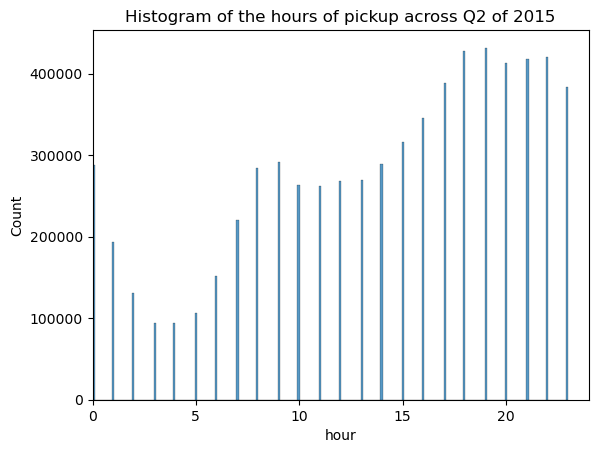

In [267]:
#Creating a Histogram in Seaborn: 

# Histogram to check hours

sns.histplot(q215['hour'])
plt.xlim(0,24)
plt.title('Histogram of the hours of pickup across Q2 of 2015')
plt.show();


In [268]:
# Histogram to check days:

days_2015 = q215.groupby(['hour','day_name']).size().unstack()
days_reindex = days_2015.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [269]:
days_reindex.style.background_gradient()

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,25469,24522,28995,32851,43385,64770,68189
1,14984,14417,16119,18392,25036,47650,56383
2,9280,8575,9521,10838,15664,34500,42019
3,7085,5990,6698,7783,11157,24917,29930
4,10889,8614,9033,10269,13642,19847,21771
5,16761,14469,14466,15784,17082,14438,13892
6,25358,24097,24146,25258,25295,15043,12764
7,36005,38253,38480,39054,36968,17619,14264
8,45807,49790,48535,49221,48034,24125,19013


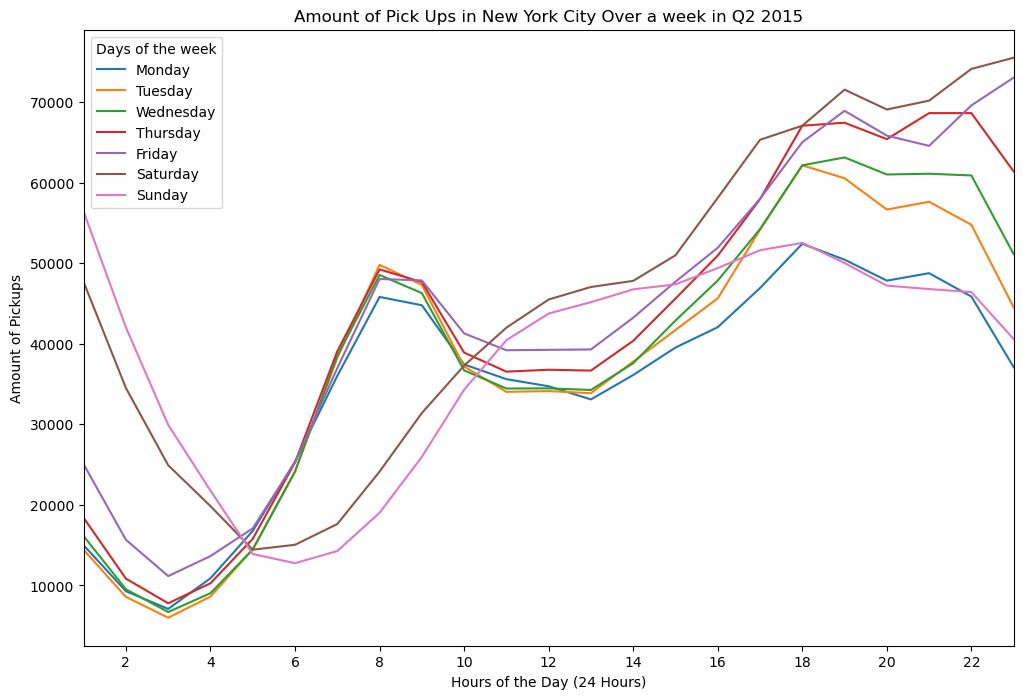

In [270]:
#custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=days_reindex, dashes = False).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week in Q2 2015", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

#### MOST POPULAR UBER BASE (Q2 - 2015)

In [271]:
q215.shape 

(6751198, 7)

In [272]:
q215.base_number.unique()

array(['B02598', 'B02764', 'B02682', 'B02765', 'B02617', 'B02512',
       'B02836', 'B02835'], dtype=object)

In [273]:
#BREAKDOWN OF EACH BASE 
base_151 = q215.query('`base_number` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_152 = q215.query('`base_number` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_153 = q215.query('`base_number` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_154 = q215.query('`base_number` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_155 = q215.query('`base_number` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885
base_156 = q215.query('`base_number` == "B02765"') # BASE NAME = GRUN
base_157 = q215.query('`base_number` == "B02836"') # BASE NAME = DRINNEN 
base_158 = q215.query('`base_number` == "B02835"') # BASE NAME = DREIST 

In [274]:
b1 = base_151.value_counts().sum()
b2 = base_152.value_counts().sum()
b3 = base_153.value_counts().sum()
b4 = base_154.value_counts().sum()
b5 = base_155.value_counts().sum()
b6 = base_156.value_counts().sum()
b7 = base_157.value_counts().sum()
b8 = base_158.value_counts().sum()

In [275]:
print(b1)
print(b2)
print(b3)
print(b4)
print(b5)
print(b6)
print(b7)
print(b8)

103413
689467
900258
2015134
2315878
698637
1990
26421


In [276]:
103413 + 689467 + 900258 + 2015134 + 2315878 + 698637 + 1990 + 26421

6751198

In [277]:
bases = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH', 'GRUN', 'DRINNEN', 'DREIST'],
        'Totals' : [b1, b2, b3,  b4,  b5,  b6, b7, b8]}

bases15 = pd.DataFrame(bases)

In [278]:
bases15

,Base,Totals
0,UNTER,103413
1,HINTER,689467
2,WEITER,900258
3,CHMECKEN,2015134
4,DANACH,2315878
5,GRUN,698637
6,DRINNEN,1990
7,DREIST,26421


In [279]:
x151 = bases15['Base']
y151 = bases15['Totals']

#### MOST POPULAR BASE (Q2 - 2015)

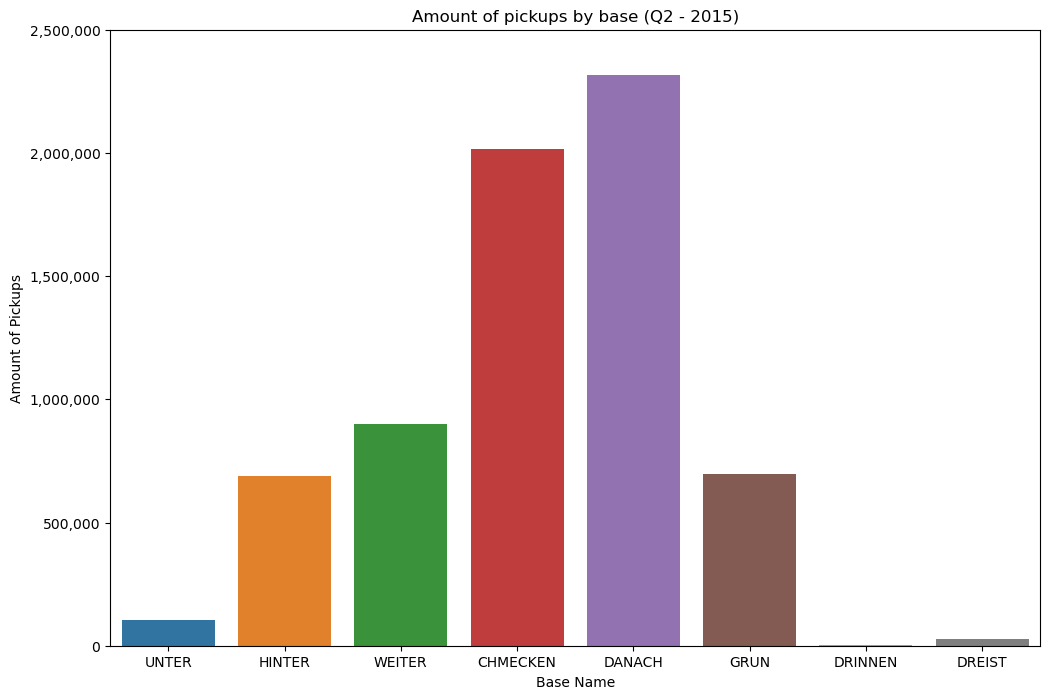

In [280]:
plt.figure(figsize= (12,8))
sns.barplot(x = x151, y = y151, data = bases15).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000'], yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000], ylim = (0,2500000));
plt.show()

#### MOST POPULAR MONTH FOR PICK UPS

In [281]:
# CREATING A NEW DATA FRAME CALLED DAYS_15 
days_15 = q215.copy()

In [282]:
q215.head()

,date,base_number,location_id,month,day_name,hour,day
6477194,2015-04-01 00:01:00,B02598,158,April,Wednesday,0,1
6477195,2015-04-01 00:02:00,B02764,148,April,Wednesday,0,1
6477196,2015-04-01 00:03:00,B02764,45,April,Wednesday,0,1
6477197,2015-04-01 00:03:00,B02764,231,April,Wednesday,0,1
6477198,2015-04-01 00:03:00,B02764,234,April,Wednesday,0,1


In [283]:
q215.tail()

,date,base_number,location_id,month,day_name,hour,day
14270471,2015-06-30 23:59:00,B02764,161,June,Tuesday,23,30
14270472,2015-06-30 23:59:00,B02764,80,June,Tuesday,23,30
14270473,2015-06-30 23:59:00,B02764,255,June,Tuesday,23,30
14270474,2015-06-30 23:59:00,B02764,246,June,Tuesday,23,30
14270478,2015-06-30 23:59:00,B02682,88,June,Tuesday,23,30


In [284]:
q215.shape

(6751198, 7)

In [285]:
days_15.head()

,date,base_number,location_id,month,day_name,hour,day
6477194,2015-04-01 00:01:00,B02598,158,April,Wednesday,0,1
6477195,2015-04-01 00:02:00,B02764,148,April,Wednesday,0,1
6477196,2015-04-01 00:03:00,B02764,45,April,Wednesday,0,1
6477197,2015-04-01 00:03:00,B02764,231,April,Wednesday,0,1
6477198,2015-04-01 00:03:00,B02764,234,April,Wednesday,0,1


In [286]:
mon15 = days_15.query('`day_name` == "Monday"')
tues15 = days_15.query('`day_name` == "Tuesday"')
wed15 = days_15.query('`day_name` == "Tuesday"')
thur15 = days_15.query('`day_name` == "Thursday"') 
fri15 = days_15.query('`day_name` == "Friday"') 
sat15 = days_15.query('`day_name` == "Saturday"') 
sun15 = days_15.query('`day_name` == "Sunday"') 

In [287]:
print(len(mon15))
print(len(tues15))
print(len(wed15))
print(len(thur15))
print(len(fri15))
print(len(sat15))
print(len(sun15))

824191
890691
890691
999315
1050842
1115726
946419


In [288]:
total_mon = len(mon15)
total_tues = len(tues15)
total_wed = len(wed15)
total_thur = len(thur15)
total_fri = len(fri15)
total_sat = len(sat15)
total_sun = len(sun15)

In [289]:
# Creating a data frame for the most popular weekday for pick ups

day_of_week = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [total_mon, total_tues, total_wed, total_thur, total_fri, total_sat, total_sun],
}

# Convert data to a DataFrame
most_pop_day = pd.DataFrame(day_of_week)

In [290]:
most_pop_day

,day_of_week,count
0,Monday,824191
1,Tuesday,890691
2,Wednesday,890691
3,Thursday,999315
4,Friday,1050842
5,Saturday,1115726
6,Sunday,946419


In [291]:
xa = most_pop_day['day_of_week']
ya = most_pop_day['count']

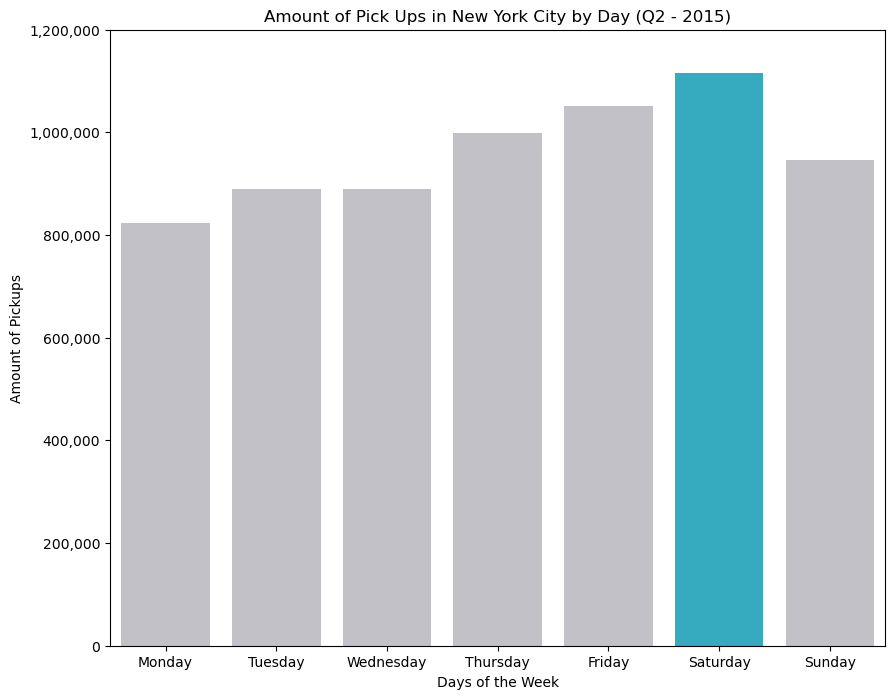

In [292]:
custom_colours6 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xa, y = ya, palette = custom_colours6).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 - 2015)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', ], ylim = (0,1200000));
plt.show()

MOST POPULAR MONTH: 

In [293]:
df_0414.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [294]:
df_0414.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [295]:
df_1504


,date,base_number,location_id,month,day_name,hour,day
6477194,2015-04-01 00:01:00,B02598,158,April,Wednesday,0,1
6477195,2015-04-01 00:02:00,B02764,148,April,Wednesday,0,1
6477196,2015-04-01 00:03:00,B02764,45,April,Wednesday,0,1
6477197,2015-04-01 00:03:00,B02764,231,April,Wednesday,0,1
6477198,2015-04-01 00:03:00,B02764,234,April,Wednesday,0,1
...,...,...,...,...,...,...,...
8758022,2015-04-30 23:59:00,B02765,90,April,Thursday,23,30
8758023,2015-04-30 23:59:00,B02765,68,April,Thursday,23,30
8758024,2015-04-30 23:59:00,B02764,158,April,Thursday,23,30
8758026,2015-04-30 23:59:00,B02764,231,April,Thursday,23,30


In [296]:
apr_15 = len(df_1504)
may_15 = len(df_1505)
jun_15 = len(df_1506)

In [297]:
apr_15

1991220

In [298]:
pop_month = {
    'month': ['April', 'May', 'June'],
    'count': [apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
most_pop_month = pd.DataFrame(pop_month)

In [ ]:
most_pop_month.head()

,month,count
0,April,1991220
1,May,2338203
2,June,2421775


In [ ]:
1991220 + 2338203 + 2421775

6751198

In [ ]:
1991220 + 2338203 + 2421775

6751198

In [ ]:
xb = most_pop_month['month']
yb = most_pop_month['count']

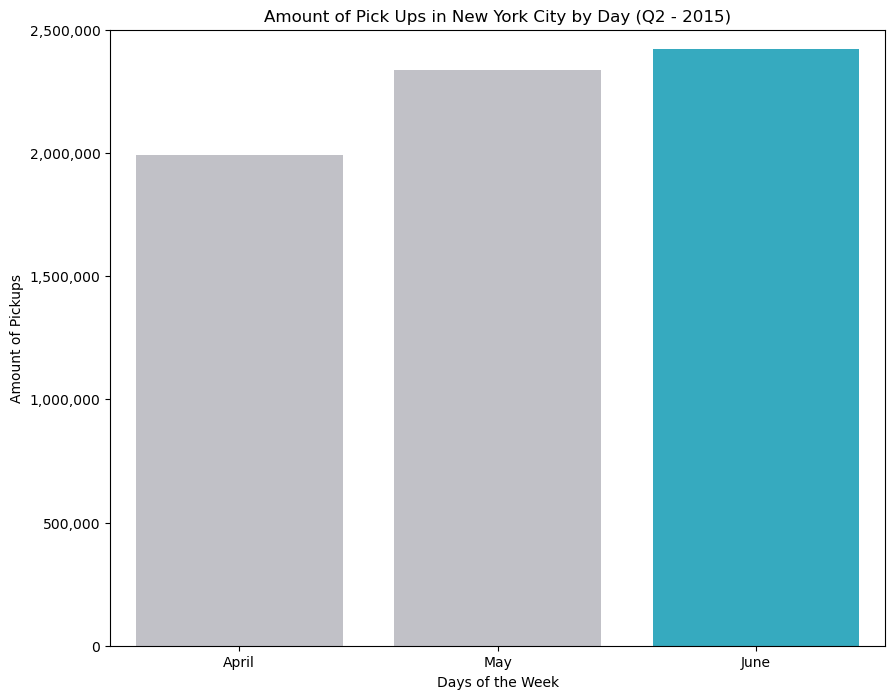

In [ ]:
custom_colours7 = ['#c0c0c8', '#c0c0c8', '#1fbad6']

plt.figure(figsize= (10,8))
sns.barplot(x = xb, y = yb, palette=custom_colours7).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

LINE PLOT PICK-UPS ON A MONTH BASIS - Q2 2014 / Q2 2015

In [306]:
comp_month_graph.head()


,month,count_14,count_15
0,April,556767,1991220
1,May,642360,2338203
2,June,653158,2421775


In [307]:
data_3 = {
    'month': ['April', 'May', 'June'],
    'count_14': [556767, 642360, 653158],
    'count_15': [apr_15, may_15, jun_15]
}

# Convert data to a DataFrame
comp_month_graph = pd.DataFrame(data_3)

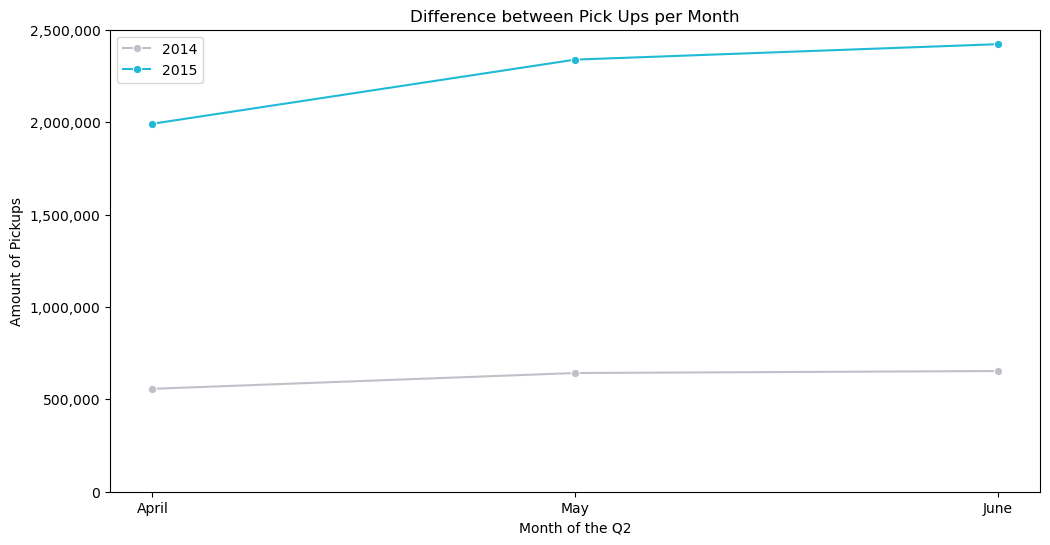

In [338]:
pickup = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000']
pickups = [0, 500000, 1000000, 1500000, 2000000, 2500000]
uber_blue = '#1fbad6'
uber_grey = '#c0c0c8'

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_14'], data=comp_month_graph, label = '2014', marker = 'o', color = uber_grey).set()
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_15'], data=comp_month_graph, label = '2015', marker = 'o', color = uber_blue)
plt.title('Difference between Pick Ups per Month')
plt.ylabel('Amount of Pickups')
plt.xlabel('Month of the Q2')
plt.yticks(pickups, pickup)
plt.ylim(0, 2500000)
plt.legend()
plt.show();